In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
def get_data():
    df = pd.read_csv("C:/Users/Dell/Desktop/datasets/ecomerce.csv")
    #to display the 1st 5 rows of data
    #df.head()
    
    #check the values of file
    data = df.values
    
    # shuffle the data 
    np.random.shuffle(data)
    
    #split features and labels
    
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32)
    print(X.shape)
    print(Y.shape)
    
    #one hot encode the categorical data
    #create a new matrix X2 with the correct number of columns
    
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] #non-categorical
    
    #one hot
    for n in range(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1
        
    #method 2
    #Z = np.zeros((N,4))
    #Z[np.arange(N), X[:,d-1].astype(np.int32)] = 1
    #assign: X2[:, -4:] = Z
    #assert(np.abs(X2[:,-4:] - Z).sum() < 10e-10)
    
    #assign X2 back  to X, since we don't need original anymore
    X = X2
    print(X.shape)
    
    #split train and test data
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]
    
    #normalize columns 1 and 2
    for i in(1, 2):
        m = Xtrain[:,i].mean()
        s = Xtrain[:,i].std()
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s
        
        
    return Xtrain,Ytrain,Xtest,Ytest

In [26]:
def get_binay_data():
    #return only the data from the first 2 classes
    Xtrain,Ytrain,Xtest,Ytest = get_data()
    X2train = Xtrain[Ytrain <= 1]
    Y2train = Ytrain[Ytrain <= 1]
    X2test = Xtest[Ytest <= 1]
    Y2test = Ytest[Ytest <= 1]
    return X2train,Y2train,X2test,Y2test

In [27]:
get_data()

(500, 5)
(500,)
(500, 8)


(array([[ 1.        , -0.82239537, -0.03440701, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.        ,  0.13666629,  0.47480977, ...,  0.        ,
          1.        ,  0.        ],
        [ 1.        ,  0.13666629, -0.22625396, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        , -0.82239537,  5.05611288, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.13666629,  0.51168397, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.        ,  2.05478959, -1.01162296, ...,  0.        ,
          0.        ,  0.        ]]),
 array([0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 3, 3, 0,
        0, 1, 0, 1, 2, 2, 3, 1, 0, 2, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1,
        3, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 3, 1, 0, 0, 1, 3, 0, 2, 2, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 1,
        0, 1, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
   

In [28]:
get_binay_data()

(500, 5)
(500,)
(500, 8)


(array([[ 0.        ,  0.17259885, -0.95887114, ...,  1.        ,
          0.        ,  0.        ],
        [ 0.        ,  1.13148137, -0.36065421, ...,  0.        ,
          0.        ,  1.        ],
        [ 1.        ,  1.13148137, -0.92318764, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.        , -0.78628366, -1.066851  , ...,  1.        ,
          0.        ,  0.        ],
        [ 1.        , -0.78628366, -0.61941768, ...,  1.        ,
          0.        ,  0.        ],
        [ 1.        , -0.78628366,  0.74714445, ...,  0.        ,
          1.        ,  0.        ]]),
 array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
   

In [30]:
from sklearn.utils import shuffle

In [31]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [33]:
Xtrain,Ytrain,Xtest,Ytest = get_data()
D = Xtrain.shape[1]
K = len(set(Ytrain) | set(Ytest))

(500, 5)
(500,)
(500, 8)


In [34]:
D

8

In [35]:
K

4

In [36]:
#convert to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

In [37]:
Ytrain_ind

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [38]:
Ytest_ind

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [39]:
#randomly initialize weights
W = np.random.randn(D, K)
b = np.zeros(K)

In [40]:
W

array([[-0.67429411,  0.21162247,  1.48351744,  0.04598075],
       [ 0.02453331,  0.80203893, -1.62323515,  1.22657504],
       [-1.20330332,  0.14790288, -0.89823947, -0.75349704],
       [ 0.35795101, -1.96394931, -1.8719832 , -1.42569029],
       [-1.45704959,  1.30675408,  0.19684875,  0.68274108],
       [ 1.34778251,  0.5001343 ,  0.76527801,  0.22498728],
       [-0.83787012, -0.34541019,  1.29788499,  0.61219834],
       [ 0.67587822, -0.89883793, -0.17377587,  1.08547578]])

In [41]:
b

array([0., 0., 0., 0.])

In [42]:
#make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis = 1, keepdims = True)

In [43]:
#forward prop
def forward(X, W, b):
    return softmax(X.dot(W) + b)

In [44]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis = 1)

In [45]:
#calculate accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

In [46]:
def cross_entropy(T, pY):
    return np.mean(T*np.log(pY))

In [47]:
#train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind,pYtrain)
    ctest = cross_entropy(Ytest_ind,pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    
    #gradient descent
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 100 == 0:
        print(i, ctrain, ctest)
        
        

0 -0.6189537863387885 -0.639668981454544
100 -0.118856707643377 -0.1334989725247313
200 -0.1047689943338108 -0.11887782642190899
300 -0.09848866487223688 -0.11336642964852967
400 -0.09451642653821399 -0.11049890684056866
500 -0.09166655675884644 -0.10885008231363924
600 -0.08948389591040758 -0.10787472465944888
700 -0.08774334661160899 -0.10730875901449631
800 -0.0863160760768306 -0.10700679579403577
900 -0.08512111691693063 -0.10688201567122366
1000 -0.08410422700085297 -0.10687955371623051
1100 -0.08322735052428054 -0.10696324741972854
1200 -0.08246283387706234 -0.10710846519369403
1300 -0.08179001570512082 -0.10729797720958927
1400 -0.08119310378880215 -0.10751946192054695
1500 -0.08065979519467534 -0.10776394231457816
1600 -0.08018034789185044 -0.10802477432335886
1700 -0.0797469379518655 -0.10829697495483925
1800 -0.07935320355391218 -0.10857676567314672
1900 -0.07899391467734757 -0.10886125562615662
2000 -0.07866472942888719 -0.10914821776290806
2100 -0.07836201135617799 -0.10943

In [48]:
print("final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("final test classification_rate:", classification_rate(Ytest, predict(pYtest)))


final train classification_rate: 0.925
final test classification_rate: 0.84


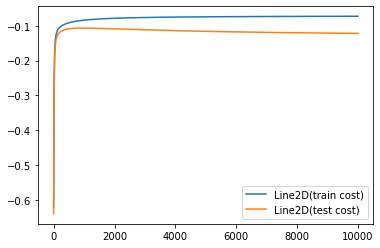

In [50]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()